<a href="https://colab.research.google.com/github/phoenix2000/NNFL/blob/main/NNFL_Q4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
downloaded = drive.CreateFile({'id':'1PCi4oq0jPcwipe3qKV3Wr6N7La1Ffi-a'}) 
downloaded.GetContentFile('training_output.xlsx')
downloaded = drive.CreateFile({'id':'1MoqnataPMfrGfLyLZ2FWWIXLSctWJQgW'}) 
downloaded.GetContentFile('test_output.xlsx')
downloaded = drive.CreateFile({'id':'1K2q1GW_PXa9OF_9B5AWCBtF1ydq9AL-z'}) 
downloaded.GetContentFile('training_feature_matrix.xlsx')
downloaded = drive.CreateFile({'id':'1u-mUX_4ERXJnCTdu3aeQIOiNfAwVqyDq'}) 
downloaded.GetContentFile('test_feature_matrix.xlsx')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

training_output=pd.read_excel('training_output.xlsx')
test_output=pd.read_excel('test_output.xlsx')
training_feature_matrix=pd.read_excel('training_feature_matrix.xlsx')
test_feature_matrix=pd.read_excel('test_feature_matrix.xlsx')

In [ ]:
x=training_feature_matrix.to_numpy() 
y=training_output.to_numpy()
x_bar=np.mean(x,axis=0)
x_std=np.std(x,axis=0)
x_new=(x-x_bar)/(x_std)
column_of_ones=np.ones(244).T
x_new2=np.insert(x_new, 0,column_of_ones, axis=1)
y_bar=np.mean(y,axis=0)
y_std=np.std(y,axis=0)
y_new=(y-y_bar)/(y_std)

In [ ]:
x_test=test_feature_matrix.to_numpy()
y_test=test_output.to_numpy()
x_test_new=(x_test-x_bar)/(x_std)
ones_column=np.ones(103)
x_test_new2=np.insert(x_test_new,0,ones_column, axis=1)
y_test_new=(y_test-y_bar)/(y_std)
m,z=np.shape(x_test)

In [ ]:
def cost_func(x,y,w,lamb):
  J=0
  J2=0
  for i in range(m):
    J=J+(np.dot(w,x[i].T)-y[i])**2
  for i in range(3):
    J2=J2 + abs(w[0,i])
  J_final=(0.5/m)*(J)+lamb*J2
  return J_final

In [ ]:
m,n=np.shape(x_new2)
w=np.zeros((1,3))
W=np.zeros((m,3))
JJ=np.zeros((m,1))
def gradient_descent(X,Y,alpha,lamb):
  mse=0
  W[0,0]=w[0,0]
  W[0,1]=w[0,1]
  W[0,1]=w[0,1]
  for k in range(m):
    for i in range(m):
      for j in range(3):
        w[0,j]=w[0,j]-alpha*((np.dot(w,X[i].T)-Y[i])*X[i,j] + lamb*np.sign(w[0,j]))
    W[k]=w
    JJ[k]=cost_func(X,Y,w,lamb)
  for i in range(m):
    diff_square=(np.dot(w,X[i].T)-Y)**2
    mse=mse+diff_square
  mse=mse/m
  plt.plot(JJ)
  a=np.array(W[:,0])
  b=np.array(W[:,1])
  c=np.array(W[:,2])
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  p=JJ.reshape((244,))
  ax = fig.gca(projection='3d')
  ax.plot(a,b,p)
  ax.set_xlabel('W1')
  ax.set_ylabel('W2')
  ax.set_zlabel('Cost')
  return (mse[m-1])
  


array([2.19946712])

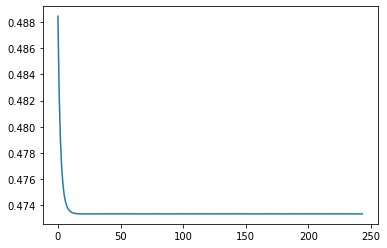

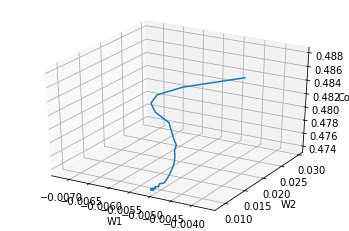

In [ ]:
gradient_descent(x_new2,y_new,0.001,0.04)

In [ ]:
m,n=np.shape(x_new2)
w2=np.zeros((1,3))
W2=np.zeros((m,3))
JJ2=np.zeros((m,1))
def gradient_descentsto(X,Y,alpha,lamb):
  mse=0
  W2[0,0]=w2[0,0]
  W2[0,1]=w2[0,1]
  W2[0,1]=w2[0,1]

  for i in range(m):
    for j in range(3):
      w2[0,j]=w2[0,j]-alpha*(np.dot(w,X[i].T)-Y[i])*X[i,j]+lamb*np.sign(w2[0,j])
    W2[i]=w2
    JJ[i]=cost_func(X,Y,w2,lamb)
  for i in range(m):
    diff_square=(np.dot(w2,X[i].T)-Y)**2
    mse=mse+diff_square
  mse=mse/m
  plt.plot(JJ)
  a=np.array(W2[:,0])
  b=np.array(W2[:,1])
  c=np.array(W2[:,2])
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  p=JJ.reshape((244,))
  ax = fig.gca(projection='3d')
  ax.plot(a,b,p)
  ax.set_xlabel('W1')
  ax.set_ylabel('W2')
  ax.set_zlabel('Cost')
  return (mse[m-1])

array([2.17612847])

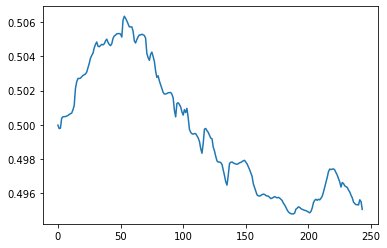

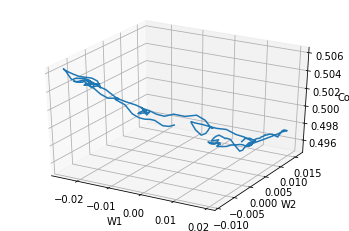

In [ ]:
gradient_descentsto(x_new2,y_new,0.001,0.0001)

In [ ]:
def test_model(x,y):
  m,n=np.shape(x_test_new2)
  predicted_values=np.zeros((m,1))
  mse=0
  for i in range(m):
    predicted_values[i]= W[m-1,0]*x[i,0]+W[m-1,1]*x[i,1]+W[m-1,2]*x[i,2]
  for i in range(m):
    diff_square=(predicted_values[i]-y[i])**2
    mse=mse+diff_square
  mse=mse/m
  print("MSE=")
  return mse[0]

In [ ]:
def test_modelsto(x,y):
  m,n=np.shape(x_test_new2)
  predicted_values=np.zeros((m,1))
  mse=0
  for i in range(m):
    predicted_values[i]= W2[m-1,0]*x[i,0]+W2[m-1,1]*x[i,1]+W2[m-1,2]*x[i,2]
  for i in range(m):
    diff_square=(predicted_values[i]-y[i])**2
    mse=mse+diff_square
  mse=mse/m
  print("MSE=")
  return mse[0]

In [ ]:
test_model(x_test_new2,y_test_new)

MSE=


2.579251540058398

In [ ]:
test_modelsto(x_test_new2,y_test_new)

MSE=


3.129129800343082